In [114]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

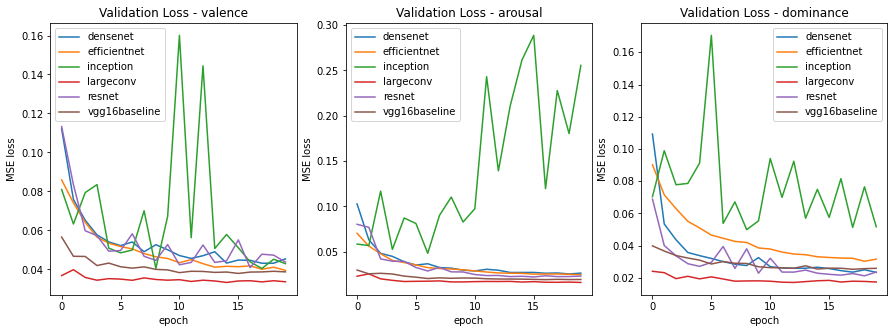

In [115]:
valence_losses = r"D:\Documents\repos\audio-emotion-analysis\baseline\results\valence\val-mse"
arousal_losses = r"D:\Documents\repos\audio-emotion-analysis\baseline\results\arousal\val-mse"
dominance_losses = r"D:\Documents\repos\audio-emotion-analysis\baseline\results\dominance\val-mse"
losses = [valence_losses, arousal_losses, dominance_losses]
fig, axs = plt.subplots(1, len(losses), figsize=(15, 5))

for idx, losses_fp in enumerate(losses):
    fps = glob.glob(os.path.join(losses_fp, '*'))
    metric = re.match(r"^.*\\([^\\]*)\\[^\\]*$", losses_fp).group(1)
    for fp in fps:
        model = re.match(r"^.*\\([^_]*)_.*\.npy", fp).group(1)
        losses = np.load(fp)[:20]
        axs[idx].plot(losses, label=model)
    axs[idx].set_title(f"Validation Loss - {metric}")
    axs[idx].set_xlabel("epoch")
    axs[idx].set_ylabel("MSE loss")
    axs[idx].legend()

plt.show()

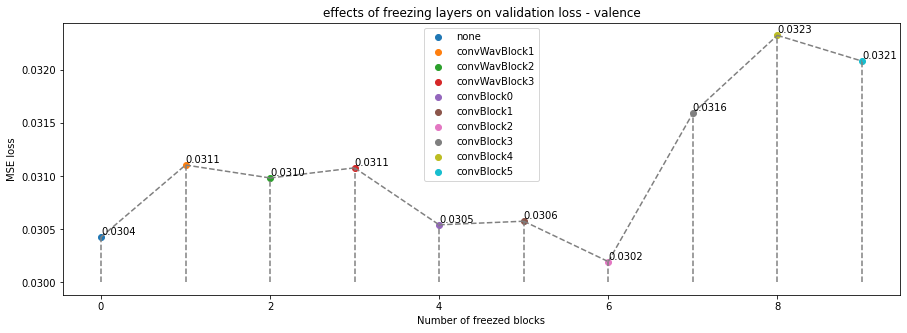

In [116]:
valence_losses = r"D:\Documents\repos\audio-emotion-analysis\PANN\results\valence\val-mse"
# arousal_losses = r"D:\Documents\repos\audio-emotion-analysis\PANN\results\arousal\val-mse"
# dominance_losses = r"D:\Documents\repos\audio-emotion-analysis\PANN\results\dominance\val-mse"
losses = [valence_losses]
fig, axs = plt.subplots(1, len(losses), figsize=(15, 5))
if type(axs) is not list:
    axs = [axs]
order = [
    'none',
    'convWavBlock1',
    'convWavBlock2',
    'convWavBlock3',
    'convBlock0',
    'convBlock1',
    'convBlock2',
    'convBlock3',
    'convBlock4',
    'convBlock5'
]
setting_losses = {}

for idx, losses_fp in enumerate(losses):
    min_losses = {}
    fps = glob.glob(os.path.join(losses_fp, '*'))
    metric = re.match(r"^.*\\([^\\]*)\\[^\\]*$", losses_fp).group(1)
    for fp in fps:
        settings = re.match(r"^.*\\freeze_([^_]*)_.*\.npy", fp).group(1)
        losses = np.load(fp)
        setting_losses[settings] = losses
        min_losses[settings] = losses.min()
    plot_x = np.arange(len(order))
    plot_y = np.array([min_losses[settings] for settings in order])
    for j in range(len(order)):
        axs[idx].scatter(plot_x[j], plot_y[j], label=order[j])
        axs[idx].annotate(f"{plot_y[j]:.4f}", (plot_x[j], plot_y[j]+2e-5))
        axs[idx].plot([plot_x[j], plot_x[j]], [0.03, plot_y[j]], color='grey', ls='--')
        if j:
            axs[idx].plot(plot_x[j-1:j+1], plot_y[j-1:j+1], color='grey', ls='--')
    
    axs[idx].set_title(f"effects of freezing layers on validation loss - {metric}")
    axs[idx].set_xlabel("Number of freezed blocks")
    axs[idx].set_ylabel("MSE loss")
    axs[idx].legend()
    
plt.show()

(0.03, 0.07)

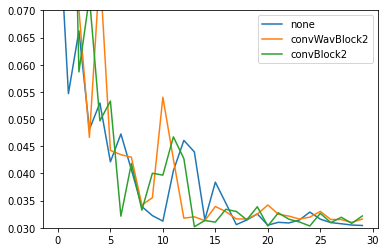

In [113]:
fig, ax = plt.subplots()
plot_settings = [
    'none',
    'convWavBlock2',
    'convBlock2',
]

for settings in plot_settings:
    ax.plot(setting_losses[settings], label=settings)
ax.legend()    
ax.set_ylim([0.03, 0.07])